# Projeto Final de Machine Learning

### Alunos: André Costa e Felipe Schiavinato Borges Souza



## Introdução

O objetivo deste trabalho é criar uma aplicação de Machine Learning capaz de recomendar musicas para um usuário baseado em seu histórico de escuta. E criar uma rede neural capaz de prever a popularidade de uma musica, dado suas características. Para isso, utilizaremos o dataset ALTERAR AQUI disponibilizado no Kaggle.

Imports:

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('spotify_data.csv')


## Análise Exploratória de Dados

### Variáveis categóricas

In [26]:
def plot_categoricals(data, cols, sorted=True):
    summary = data[cols] \
        .describe() \
        .transpose() \
        .sort_values(by='count')

    print(summary)

    for k, (col, val) in enumerate(summary['count'].items()):
        plt.figure()
        ser = data[col].value_counts()
        if sorted:
            ser = ser.sort_values()
        else:
            ser = ser.sort_index()
        ax = ser.plot.barh()
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'{col}, n={int(val)}')
        plt.show()

                   count      mean       std  min  25%  50%  75%   max
key             114000.0  5.309140  3.559987  0.0  2.0  5.0  8.0  11.0
mode            114000.0  0.637553  0.480709  0.0  0.0  1.0  1.0   1.0
time_signature  114000.0  3.904035  0.432621  0.0  4.0  4.0  4.0   5.0


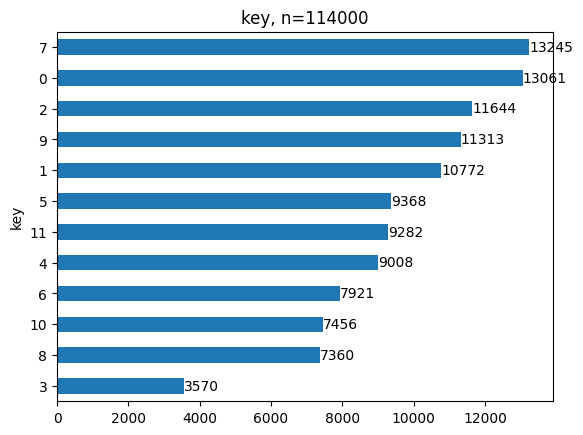

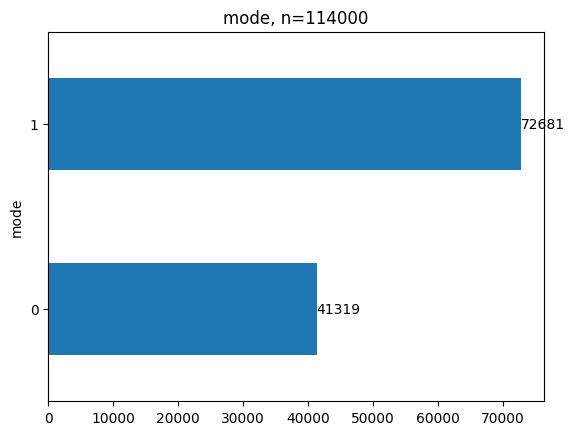

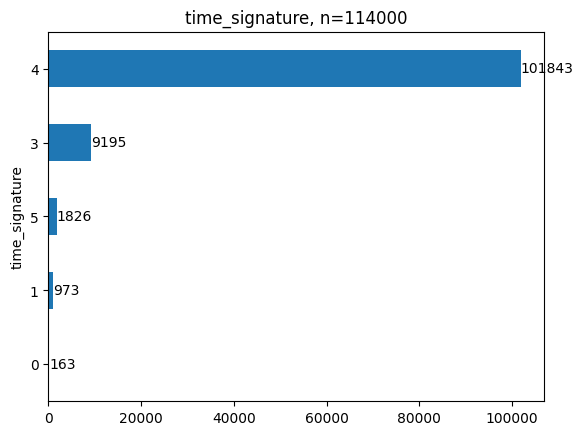

<Axes: ylabel='count'>

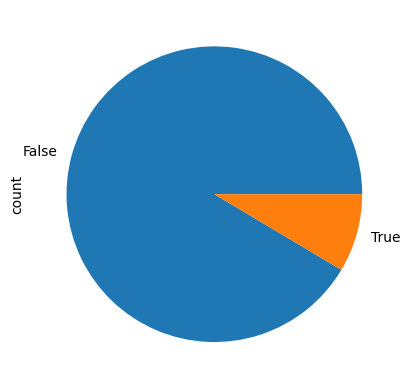

In [27]:
plot_categoricals(df,[ 'key', 'mode', 'time_signature', 'track_genre'])
df['explicit'].value_counts().plot.pie()

### Variáveis numéricas

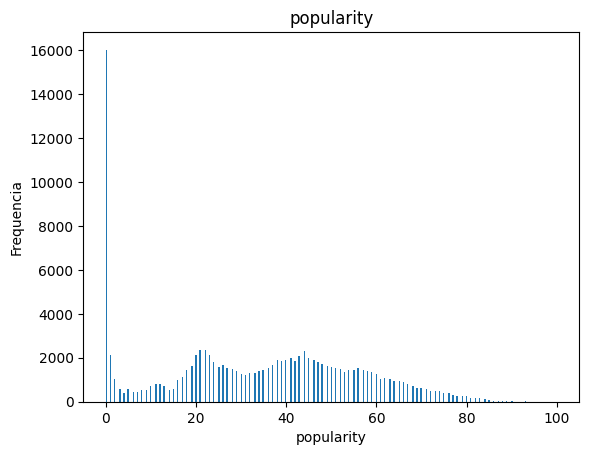

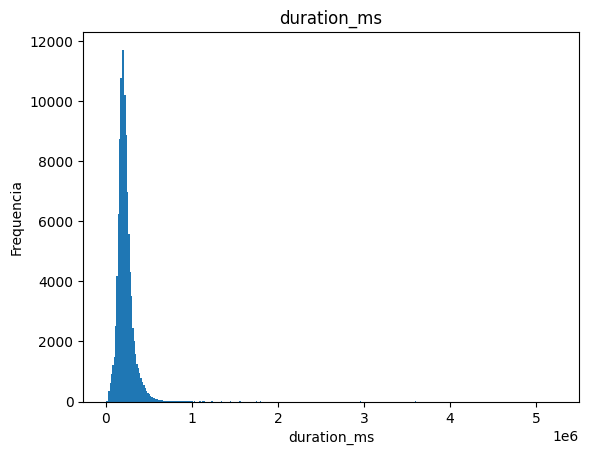

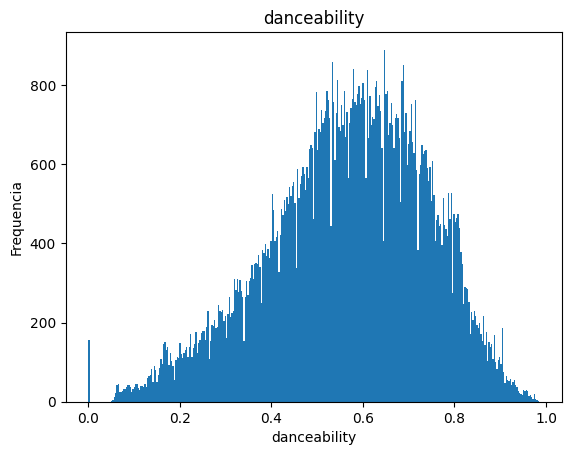

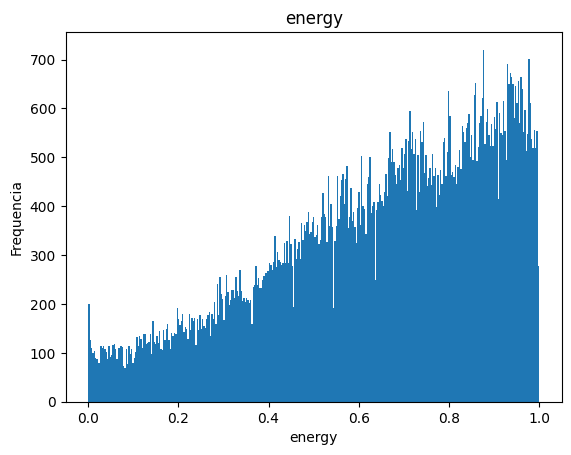

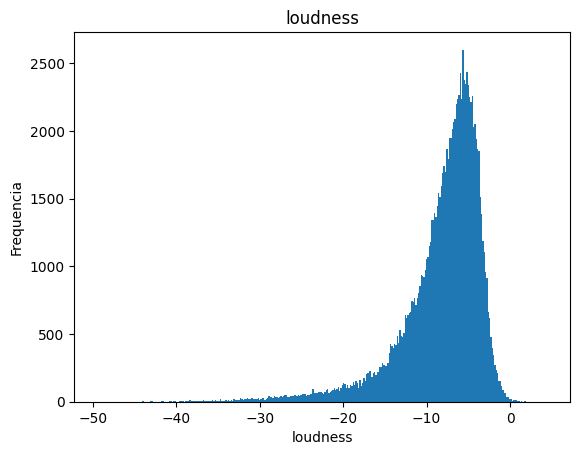

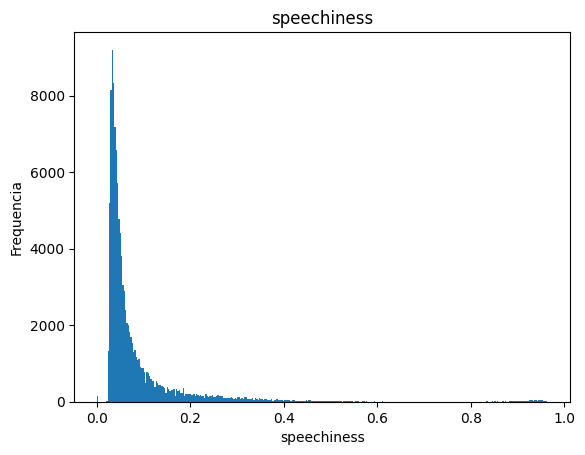

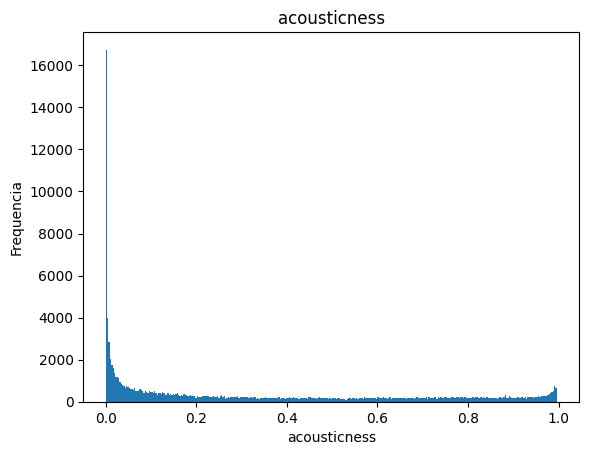

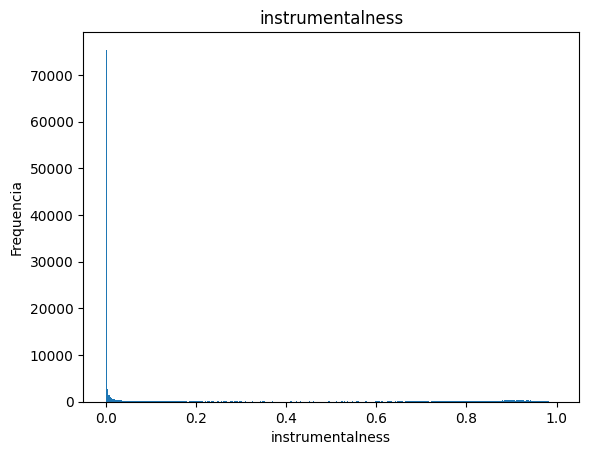

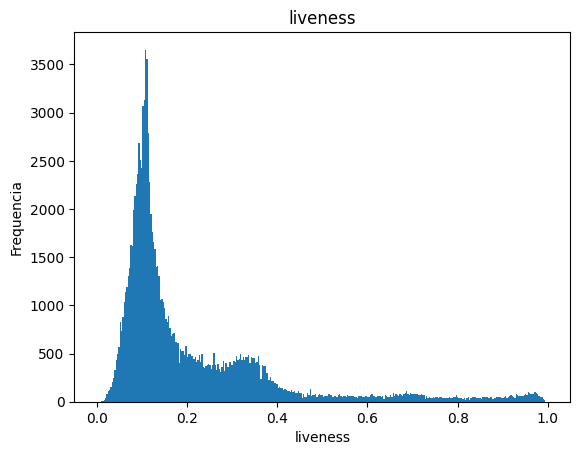

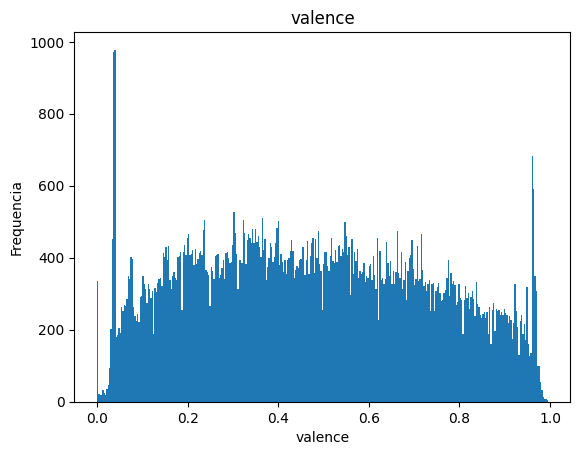

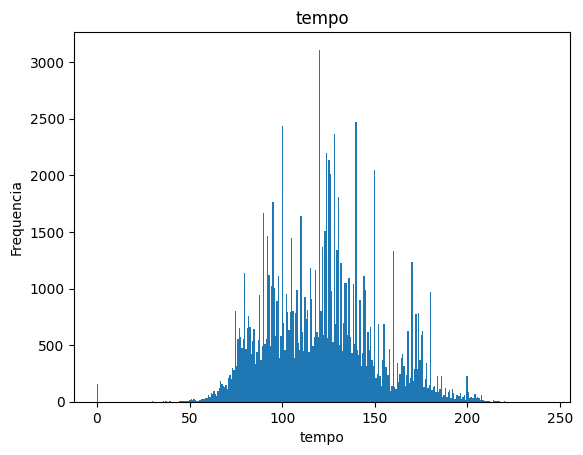

In [28]:
num_rows = df.shape[0]
bins = int(np.sqrt(num_rows))

copy = df.copy()

def plot_column(df, column):
    plt.figure()
    df[column].plot.hist(bins=bins)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequencia')
    plt.show()

for column in copy.drop(['Unnamed: 0','track_id', 'artists', 'album_name', 'track_name', 'explicit', 'key', 'mode', 'time_signature', 'track_genre'], axis=1).columns:
    plot_column(copy, column)

## Algorítmo de Rcomendação KNN

Vamos utilizar o algorítimo KNN para determinar a similaridade entre musicas e recomendar musicas similares. Para esta análise iremos levar em conta apenas as colunas contendo variaveis numéricas.

Na célula abaixo iremos selecionar as colunas desejadas e normaliza-las.

In [ ]:
features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# We instantiate the MinMaxScaler
mms = MinMaxScaler()

# We fit and transform the features
df[features] = mms.fit_transform(df[features])


(114000, 60)

Em seguida, iremos passar o dataset normalizado para o algorítimo KNN com a métrica cosseno.

In [48]:
knn = NearestNeighbors(metric='cosine') 

# Here we only keep the columns we are interested in
X = df[features]

knn.fit(X)


NearestNeighbors(metric='cosine')

Abaixo é definido uma função que recebe o nome de uma musica e retorna n musicas mais similares.

In [57]:
def recommend_songs(song_id, num_recommendations):
    song = df[df['Unnamed: 0'] == song_id]
    song_features = song[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
    
    # Use the KNN model to find k nearest neighbors
    distances, indices = knn.kneighbors(song_features, n_neighbors=num_recommendations+1)
    
    # Get list of ids for song recommendations
    rec_indices = indices.flatten()[1:]
    recommended_songs = df.loc[rec_indices]
    
    return recommended_songs


Para testar vamos escolher alguma musica do nosso dataset e ver quais musicas são recomendadas. A música escolhida foi "Lucky" do Jason Mraz. O valor que precisamos passar para o dataset é o da coluna Unnamed: 0. Que corresponde ao id do dataset. Neste caso o valor 8.

In [54]:
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


Podemos ver melhor as caracteristicas da musica escolhida na célula abaixo.

In [59]:
song = df[df['Unnamed: 0'] == 8]
song

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.414,...,-8.7,1,0.0369,0.294,0.0,0.151,0.669,130.088,4,acoustic


In [58]:
recommended_songs = recommend_songs(8, 5)  # Here, 123 is the id of the song, and 10 is the number of songs you want to recommend

# Transform into dataframe to be shown like a table
recommended_songs = pd.DataFrame(recommended_songs)
recommended_songs


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
68538,68538,2YVn2wkwLYSVkSV6qgKIPg,Kevin Martes 13,Inmortal,Jarabe - Remastered,55,142814,False,0.666,0.828,...,-5.896,0,0.0564,0.0463,0.000000,0.3540,0.690,97.992,4,latino
67881,67881,2YVn2wkwLYSVkSV6qgKIPg,Kevin Martes 13,Inmortal,Jarabe - Remastered,55,142814,False,0.666,0.828,...,-5.896,0,0.0564,0.0463,0.000000,0.3540,0.690,97.992,4,latin
65409,65409,6dG2zPUOWXk3eMC7Hb3wh3,JEON SOMI,DUMB DUMB,DUMB DUMB,59,149213,False,0.850,0.734,...,-6.415,1,0.0491,0.0221,0.000179,0.0728,0.406,103.027,4,k-pop
25477,25477,28285KFbyCq8sJofn58qlD,The O'Jays,Back Stabbers,Love Train,70,178400,False,0.743,0.572,...,-9.627,1,0.0493,0.1860,0.000014,0.1630,0.675,122.658,4,disco
84331,84331,6iGU74CwXuT4XVepjc9Emf,The Beach Boys,Pet Sounds (Original Mono & Stereo Mix Versions),God Only Knows - Mono / 1997 Remastered,68,173040,False,0.521,0.487,...,-7.525,0,0.0299,0.2530,0.000000,0.0579,0.483,117.072,4,psych-rock


## Análise de correlação

In [67]:
numerical_data = df.select_dtypes('number').drop(columns='popularity').copy()
target = df['popularity'].copy()

In [68]:
numerical_data.corrwith(target).sort_values()

instrumentalness   -0.095139
speechiness        -0.044927
valence            -0.040534
acousticness       -0.025472
mode               -0.013931
duration_ms        -0.007101
liveness           -0.005387
key                -0.003853
energy              0.001056
track_id            0.003243
artists             0.003613
track_name          0.011911
tempo               0.013205
Unnamed: 0          0.032142
track_genre         0.032692
time_signature      0.032745
danceability        0.035448
album_name          0.042476
explicit            0.044082
loudness            0.050423
dtype: float64

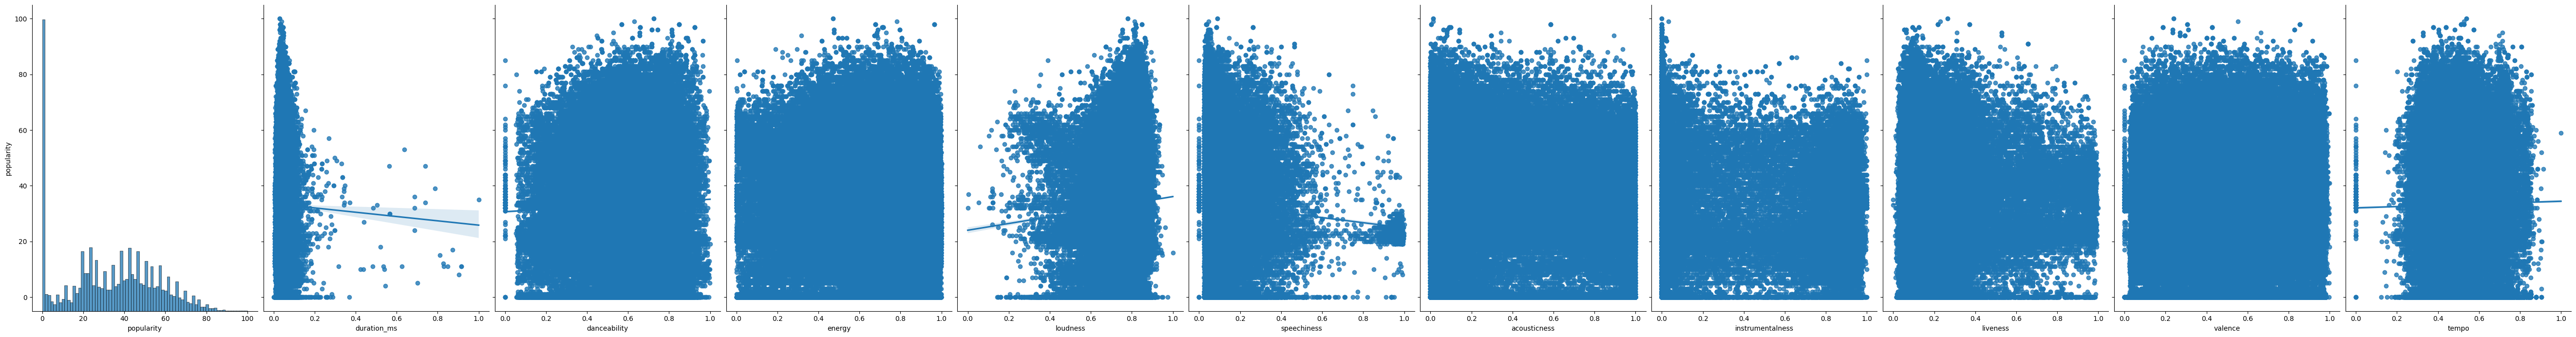

In [69]:
import seaborn as sns
sns.pairplot(df, x_vars=['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'], y_vars='popularity', height=7, aspect=0.7, kind='reg')


Como podemos obsetvar, os graficos de correlação entre as variaveis numéricas não nos dizem muito sobre a correlação entre elas. Portanto, iremos prosseguir com um modelo com rede neural ao invez de um modelo de regressão linear.

## Rede Neural para prever popularidade

Agora vamos criar uma rede neural capaz de prever a popularidade de uma musica, dado suas características.

Imports:

In [60]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

Vamos definir defice com preferencia para GPU para acelerar o treinamento da rede neural:

In [61]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Agora vamos carregar o dataset novamente e separar em treino e teste com as colunas desejadas:

In [62]:
# Load your data
df = pd.read_csv("spotify_data.csv")
copy = df.copy()

# Categorical features that you want to use
categorical_columns = ['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'key', 'mode', 'time_signature', 'track_genre']
for category in categorical_columns:
    le = LabelEncoder()
    df[category] = le.fit_transform(df[category])

# Continuous features that you want to use
continuous_columns = [ 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
mms = MinMaxScaler()
df[continuous_columns] = mms.fit_transform(df[continuous_columns])

# Split the data into train and test
train, test = train_test_split(df, test_size=0.2, random_state=42)

Em seguida vamos definir uma classe definindo o dataset em formato de tensor e uma classe com a arquitetura da rede neural:

In [63]:
# PyTorch Dataset
class SpotifyDataset(Dataset):
    def __init__(self, data, cat_cols, cont_cols):
        self.n = data.shape[0]
        self.y = torch.from_numpy(data.popularity.values).float().unsqueeze(1).to(device)
        self.cat_cols = cat_cols
        self.cont_cols = cont_cols
        self.x_cat = torch.from_numpy(data[cat_cols].values).long().to(device)
        self.x_cont = torch.from_numpy(data[cont_cols].values).float().to(device)

    def __len__(self):
        return self.n

    def __getitem__(self, idx):
        return self.x_cat[idx], self.x_cont[idx], self.y[idx]

# Define the model
class NCF(nn.Module):
    def __init__(self, embedding_sizes, num_numerical_cols, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni[0], ni[1]).to(device) for ni in embedding_sizes])
        self.embedding_dropout = nn.Dropout(p)
        self.batch_norm_num = nn.BatchNorm1d(num_numerical_cols)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_sizes))
        input_size = num_categorical_cols + num_numerical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i).to(device))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size).to(device))

        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical, x_numerical):
        embeddings = []
        for i, e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:, i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)

        x_numerical = self.batch_norm_num(x_numerical)
        x = torch.cat([x, x_numerical], 1)
        x = self.layers(x)
        return x

Preparando o dataset para treino:

In [64]:
# Training the model
train_dataset = SpotifyDataset(train, categorical_columns, continuous_columns)
test_dataset = SpotifyDataset(test, categorical_columns, continuous_columns)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


# Choose embedding size
embedding_size = 50
embedding_sizes = [(len(df[col].unique()), min(50, (len(df[col].unique())+1)//2)) for col in categorical_columns]
# Instantiate the model
model = NCF(embedding_sizes, len(continuous_columns), 1, [200,100,50], p=0.4).to(device)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Loop de treinamento:

In [65]:
# Train the model
epochs = 100

for i in range(epochs):
    i += 1
    agg_losses = []
    for cat_x, cont_x, y in train_loader:
        y = y.to(device)
        cat_x = cat_x.to(device)
        cat_x = cat_x.long()
        cont_x = cont_x.to(device)
        # Forward pass
        preds = model(cat_x, cont_x)
        loss = torch.sqrt(loss_function(preds, y)) # RMSE
        agg_losses.append(loss)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # print(f'epoch: {i:3} loss: {loss:.10f}')
    avg_agg_losses = sum(agg_losses)/len(agg_losses)
    print(f'epoch: {i:3} loss: {avg_agg_losses:.10f}')

epoch:   1 loss: 25.5081291199
epoch:   2 loss: 18.6853809357
epoch:   3 loss: 16.3279304504
epoch:   4 loss: 14.6082487106
epoch:   5 loss: 13.3577194214
epoch:   6 loss: 12.5386075974
epoch:   7 loss: 11.8127307892
epoch:   8 loss: 11.1984405518
epoch:   9 loss: 10.7280464172
epoch:  10 loss: 10.2717256546
epoch:  11 loss: 9.8687229156
epoch:  12 loss: 9.4818639755
epoch:  13 loss: 9.1966171265
epoch:  14 loss: 8.9176063538
epoch:  15 loss: 8.6981220245
epoch:  16 loss: 8.4467983246
epoch:  17 loss: 8.2398376465
epoch:  18 loss: 8.1068572998
epoch:  19 loss: 7.8959488869
epoch:  20 loss: 7.7715153694
epoch:  21 loss: 7.5716929436
epoch:  22 loss: 7.5184426308
epoch:  23 loss: 7.4092006683
epoch:  24 loss: 7.2845926285
epoch:  25 loss: 7.1802029610
epoch:  26 loss: 7.1374015808
epoch:  27 loss: 7.0313987732
epoch:  28 loss: 6.9862303734
epoch:  29 loss: 6.9032588005
epoch:  30 loss: 6.8093519211
epoch:  31 loss: 6.7684526443
epoch:  32 loss: 6.7184972763
epoch:  33 loss: 6.6254558563


Testando o modelo:

In [66]:
#After training, you can evaluate the model on the test set.
model.eval() # set the model to evaluation mode
with torch.no_grad(): # turn off gradients for the upcoming steps
    test_losses = []
    for cat_x, cont_x, y in test_loader:
        y = y.to(device)
        cat_x = cat_x.to(device)
        cat_x = cat_x.long()
        cont_x = cont_x.to(device)
        # Forward pass
        preds = model(cat_x, cont_x)
        loss = torch.sqrt(loss_function(preds, y)) # RMSE
        test_losses.append(loss.item())
    avg_test_loss = sum(test_losses) / len(test_losses)
print(f'Test Loss: {avg_test_loss:.10f}')

Test Loss: 7.8243640638


Com os testes, podemos observar que o modelo apresenta um leve overfitting, mas nada preocupante. Podemos observar também que o modelo apresenta um loss relativamente baixo. Portanto, podemos concluir que o modelo é capaz de prever a popularidade de uma musica com uma boa precisão.